# EGCO623: UCI Heart Disease Data : Feature Engineering and Model Evaluation

Arnik Vephasayanant

6538133

In [699]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [700]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [701]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/heart_disease_uci.csv')

## Dataset Columns:
* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* Values: [normal, stt abnormality, lv hypertrophy]
* thalch: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

Before doing any processing to the dataset, the data is needed to be shuffled.
This is a good practice for reasons:
1. Randomization of Data: To ensures that the order of samples does not introduce any biases into the learning process.

2. Avoiding Order Sensitivity: Some algorithms are sensitive to the order of data. The data can be too biased in one direction.

3. Generalization: This helps in generalizing the model better. If the data is not shuffled, the model might memorize patterns related to the order of the data, which would not be desirable.

4. Reducing Variance in Mini-Batch Gradient Descent

5. Avoiding Overfitting: In cases where you are doing cross-validation, shuffling ensures that each fold gets a representative sample of the data.

6. Ensuring Fairness: Shuffling helps to ensure fairness in the learning process and prevents the model from learning spurious correlations.

In [702]:
df = shuffle(df)
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
903,904,56,Male,VA Long Beach,asymptomatic,130.0,203.0,True,normal,98.0,False,1.5,flat,NaN,reversable defect,1
368,369,43,Female,Hungary,non-anginal,150.0,NaN,False,normal,175.0,False,0.0,NaN,NaN,normal,0
362,363,43,Female,Hungary,typical angina,100.0,223.0,False,normal,142.0,False,0.0,NaN,NaN,NaN,0
522,523,57,Male,Hungary,atypical angina,140.0,265.0,False,st-t abnormality,145.0,True,1.0,flat,NaN,NaN,1
532,533,43,Male,Hungary,typical angina,120.0,291.0,False,st-t abnormality,155.0,False,0.0,NaN,NaN,NaN,1


# Check for Missing Values

In [703]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / df.shape[0]) * 100

In [704]:
missing_values_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_values_info

,Missing Values,Percentage
id,0,0.000000
age,0,0.000000
sex,0,0.000000
dataset,0,0.000000
cp,0,0.000000
trestbps,59,6.413043
chol,30,3.260870
fbs,90,9.782609
restecg,2,0.217391
thalch,55,5.978261


From What we found, here is the summary of the findings:
* trestbps: 6.41% missing
* chol: 3.26% missing
* fbs: 9.78% missing
* restecg: 0.22% missing
* thalch: 5.98% missing
* exang: 5.98% missing
* oldpeak: 6.74% missing
* slope: 33.59% missing
* ca: 66.41% missing
* thal: 52.83% missing

# Statistical Summary of Numerical Fields

In [705]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Insight Data:
* *'age'*: The average age in the dataset is approximately 53.5 years with a standard deviation of 9.42 years, ranging from 28 to 77 years old.
* *'trestbps'* (Resting Blood Pressure): The average resting blood pressure is around 132 mmHg. It's worth noting that there is a value of 0, which might indicate missing or incorrect data.
* *'chol'* (Serum Cholesterol): The average cholesterol level is 199 mg/dl, with a very wide range, indicating there might be outliers or errors (a minimum value of 0 is not plausible for cholesterol levels).
* *'thalch'* (Maximum Heart Rate Achieved): On average, the maximum heart rate recorded is around 138 bpm.
* *'oldpeak'* (ST Depression): The average ST depression is about 0.88, but there are negative values, which might need further investigation since this is typically a non-negative measurement.
* *'ca'* (Number of Major Vessels): On average, there are less than one major vessel observed per fluoroscopy.
* *'num'* (Diagnosis of Heart Disease): This is the target variable, with values ranging from 0 (no presence) to 4.

# Distribution of Categorical Variables

In [706]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
categorical_distribution = df[categorical_columns].apply(pd.Series.value_counts)
categorical_distribution.T

,Cleveland,Female,Hungary,Male,Switzerland,VA Long Beach,asymptomatic,atypical angina,non-anginal,typical angina,False,True,normal,lv hypertrophy,st-t abnormality,flat,upsloping,downsloping,reversable defect,fixed defect
sex,NaN,194.0,NaN,726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,304.0,NaN,293.0,NaN,123.0,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,NaN,NaN,NaN,NaN,496.0,174.0,204.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,692.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,551.0,188.0,179.0,NaN,NaN,NaN,NaN,NaN
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,528.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.0,203.0,63.0,NaN,NaN
thal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN,NaN,NaN,NaN,NaN,192.0,46.0


* sex: There are 194 females and 726 males in the dataset.
* dataset: The data comes from multiple sources with the following counts - Cleveland: 304, Hungary: 293, Switzerland: 123, VA Long Beach: 200.
* cp (Chest Pain Type): There are four types of chest pain recorded in the dataset with the following counts - asymptomatic: 496, atypical angina: 174, non-anginal: 204, typical angina: 46.
* fbs (Fasting Blood Sugar): 138 individuals have fasting blood sugar greater than 120 mg/dl (True), and 692 do not (False).
* restecg (Resting Electrocardiographic Results): The results are distributed as - normal: 551, LV hypertrophy: 188, ST-T abnormality: 179.
* exang (Exercise-Induced Angina): 337 individuals experience exercise-induced angina (True), while 528 do not (False).
* slope (Slope of the Peak Exercise ST Segment): The slopes are recorded as - flat: 345, upsloping: 203, downsloping: 63.
* thal (Thalium Stress Test Result): The results are distributed as - reversable defect: 192, fixed defect: 46, normal: 196.

# Exploratory Data Analysis

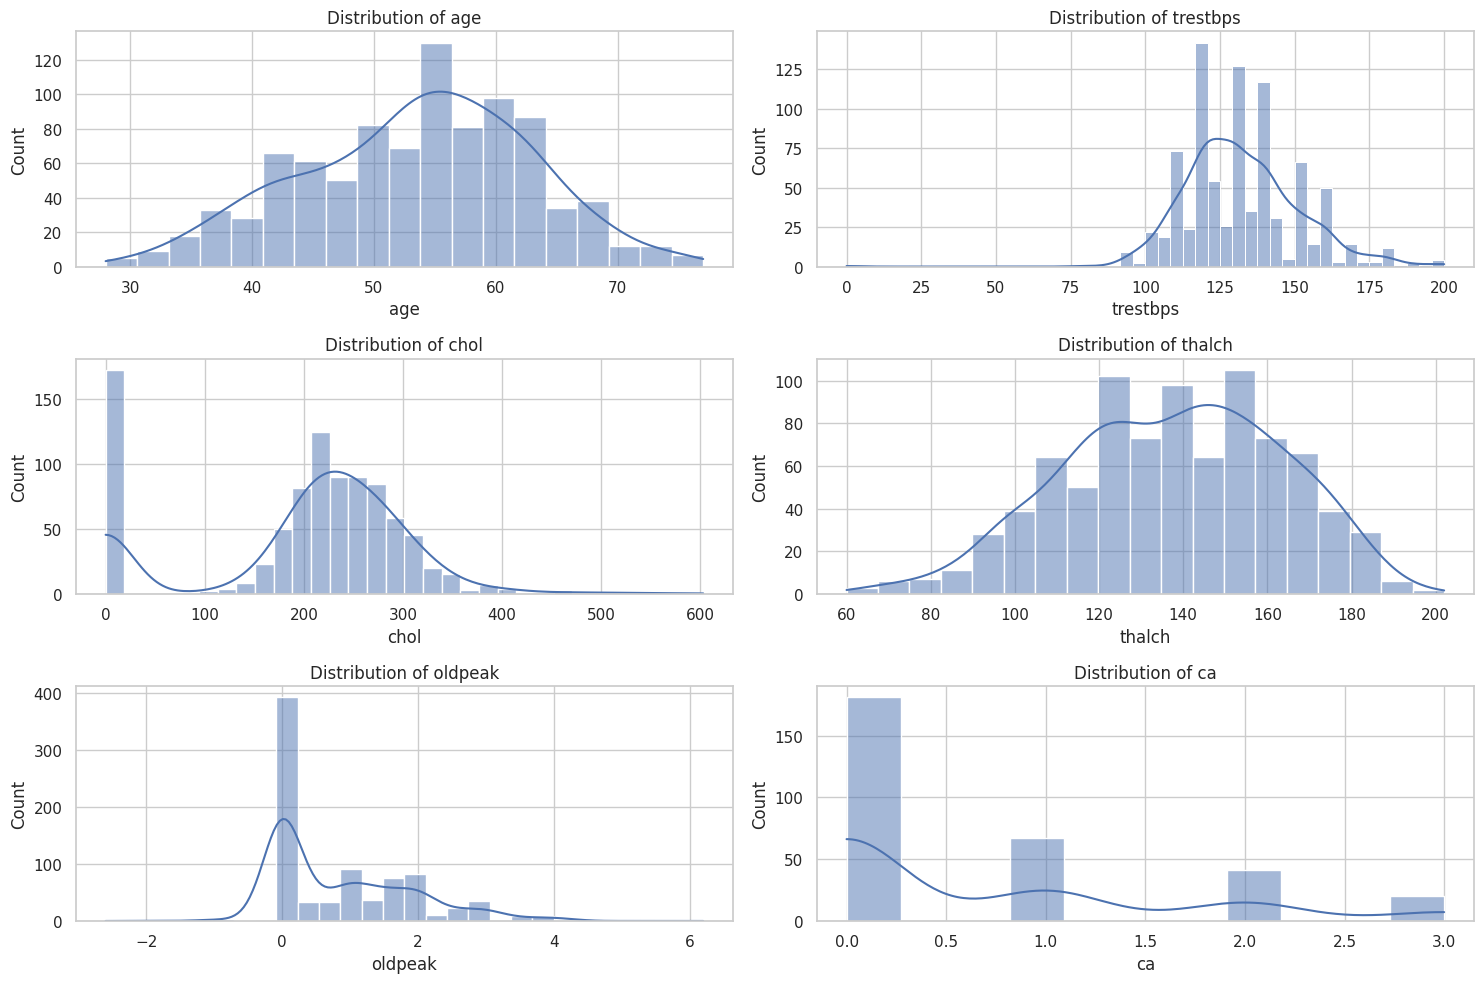

In [707]:
sns.set(style="whitegrid")

numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

* 'age': The distribution is quite normal with a slight right skew, indicating a higher number of older individuals in the dataset.
* 'trestbps' (resting blood pressure): The distribution is roughly normal, but there are some outliers on the lower end (possibly incorrect entries as mentioned before).
* 'chol' (serum cholesterol): The distribution has a right skew, indicating that higher cholesterol levels are less common.
* 'thalch' (maximum heart rate achieved): The distribution is slightly left-skewed, with most individuals having a maximum heart rate between 120 and 160 bpm.
* 'oldpeak': Most values are clustered near 0 with a long tail to the right, which is typical for this kind of measurement.
* 'ca' (number of major vessels colored by fluoroscopy): The distribution is concentrated at 0, with fewer individuals having higher values.

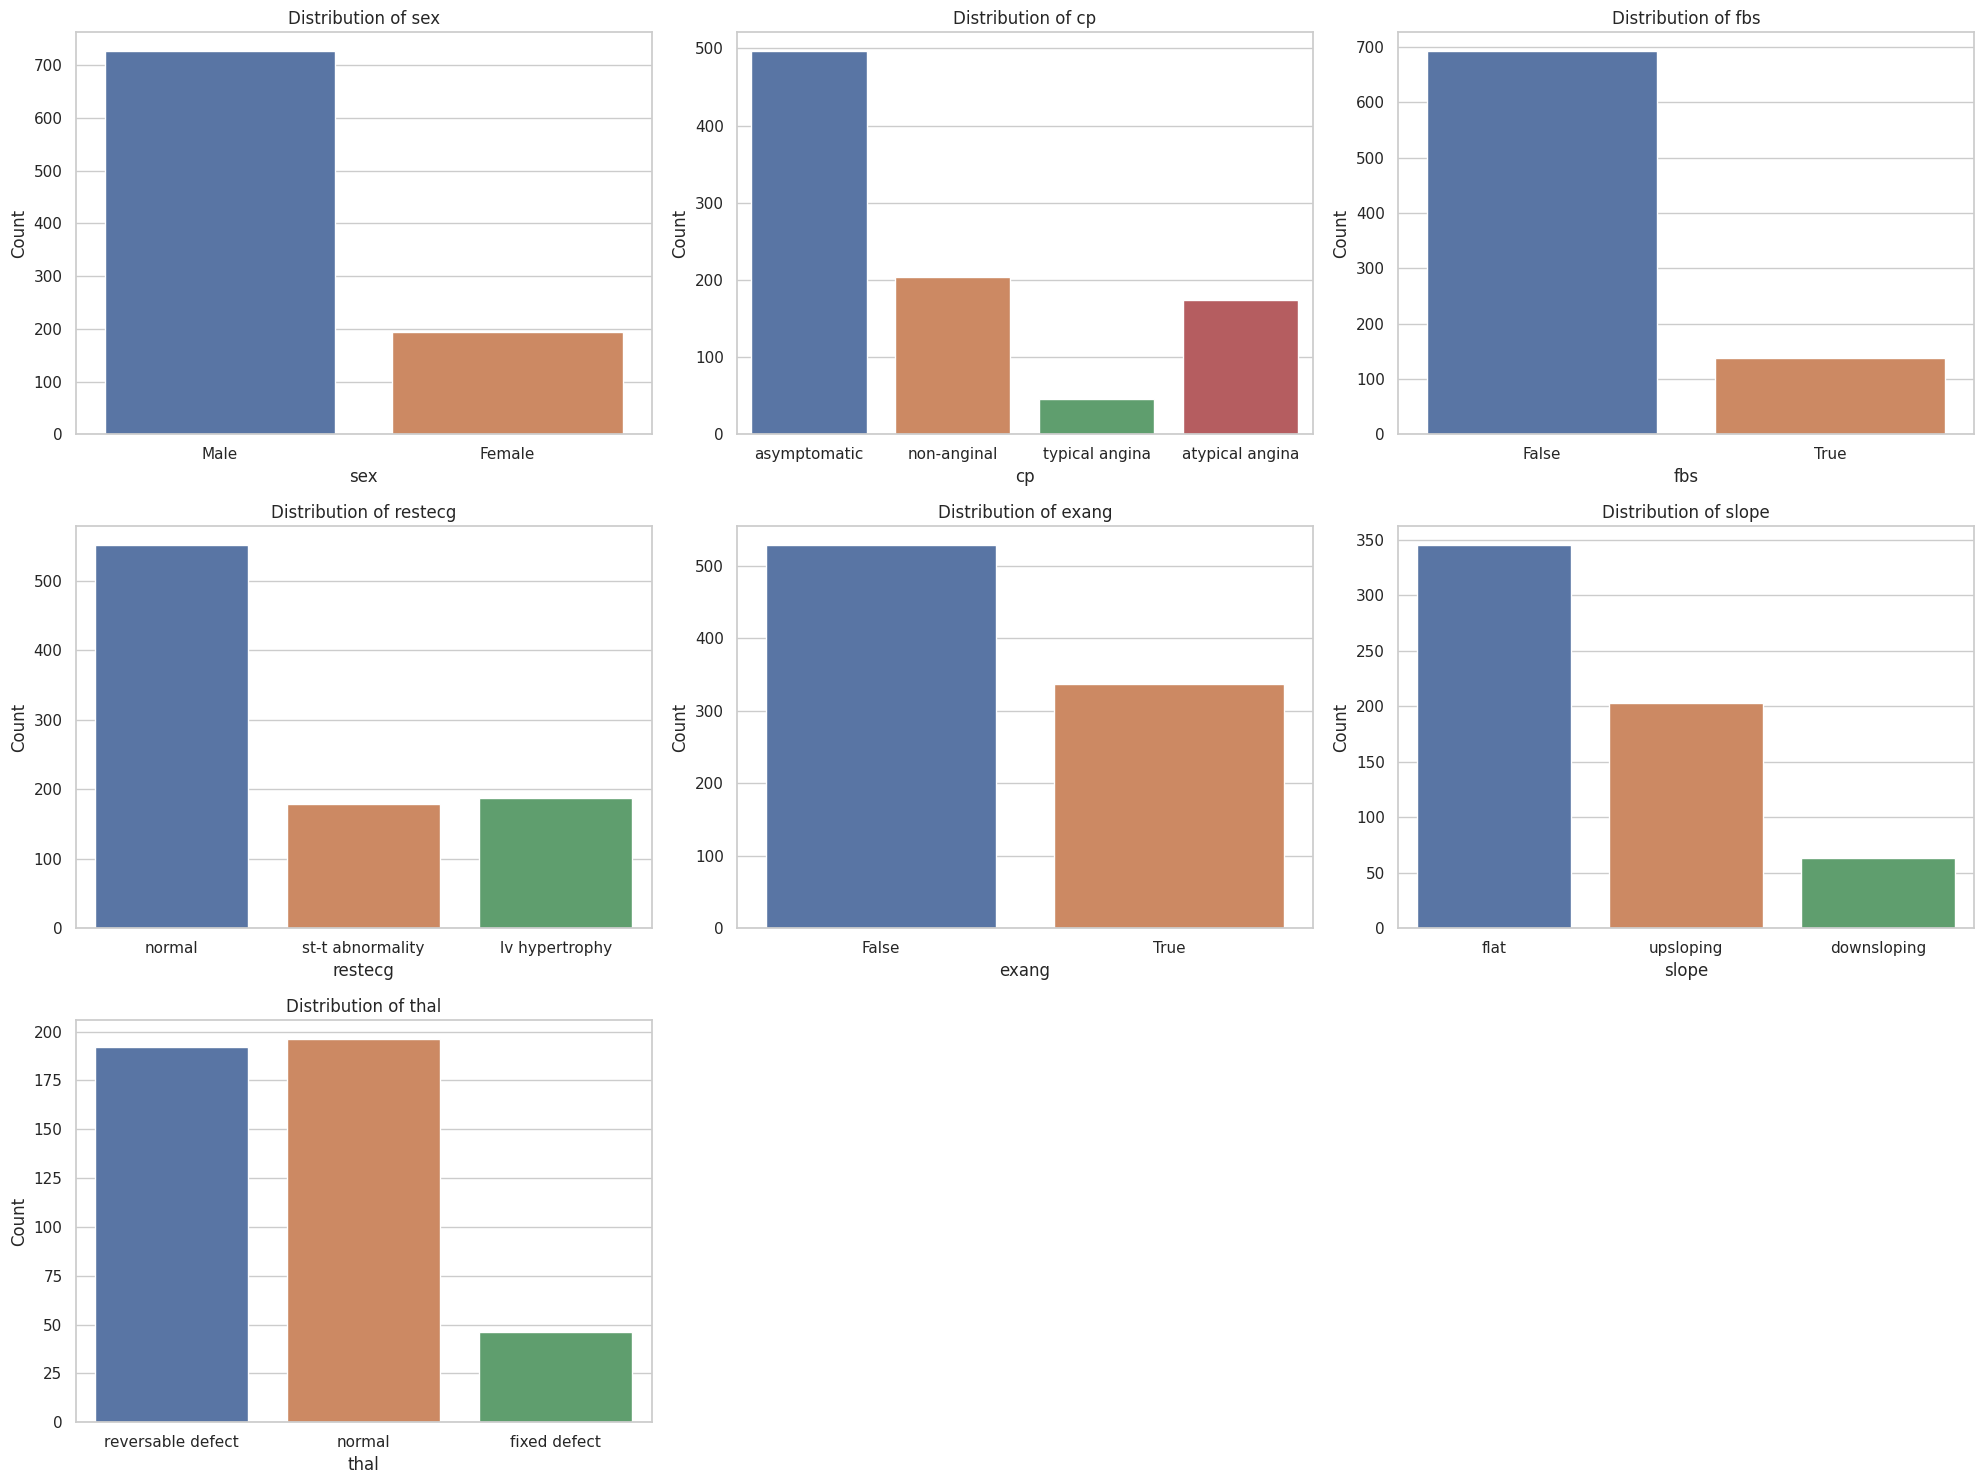

In [708]:
sns.set(style="whitegrid")
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

* 'sex': There are more male participants than female in the dataset.
* 'cp' (chest pain type): The 'asymptomatic' category is the most frequent, followed by 'non-anginal pain' and 'atypical angina', with 'typical angina' being the least common.
* 'fbs' (fasting blood sugar): Most individuals have a fasting blood sugar below 120 mg/dl.
* 'restecg' (resting electrocardiographic results): The 'normal' category is the most common, followed by 'ST-T wave abnormality', and 'left ventricular hypertrophy' is the least common.
* 'exang' (exercise induced angina): Most individuals do not experience angina induced by exercise.
* 'slope' (the slope of the peak exercise ST segment): The 'flat' category is the most common, followed by 'upsloping', and 'downsloping'. However, many values are missing in this column.
* 'thal' (thalassemia): The 'normal' category is the most common, with 'reversable defect' and 'fixed defect' being less common. This column also has many missing values.

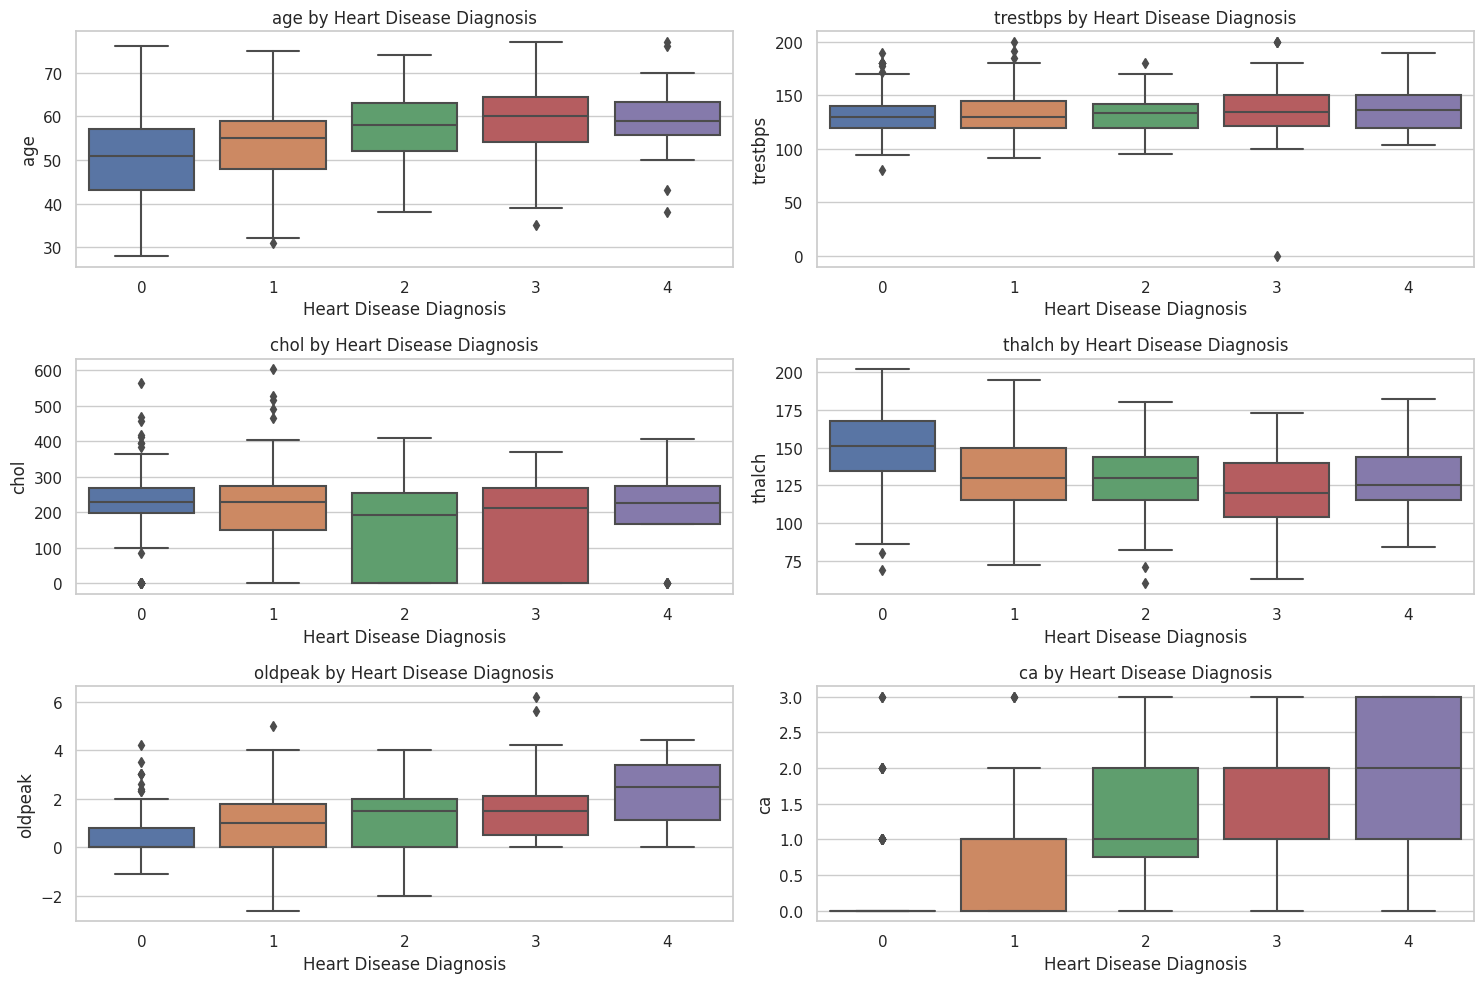

In [709]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='num', y=column, data=df)
    plt.title(f'{column} by Heart Disease Diagnosis')
    plt.xlabel('Heart Disease Diagnosis')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

* 'age': Older age groups appear to have a higher median in the categories with a heart disease diagnosis (num > 0), suggesting a possible association between age and the presence of heart disease.
* 'trestbps' (resting blood pressure): There are some differences in median values across the heart disease diagnosis categories, with some outliers in each group.
* 'chol' (serum cholesterol): Similar to trestbps, there are variations in cholesterol levels across the heart disease diagnosis categories, with a number of outliers.
* 'thalch' (maximum heart rate achieved): Lower heart rates seem to be associated with higher categories of heart disease diagnosis.
* 'oldpeak': Higher values of oldpeak are more prevalent in individuals with a heart disease diagnosis, which aligns with the clinical expectation that ST depression is a sign of heart disease.
* 'ca' (number of major vessels colored by fluoroscopy): Individuals with a higher number of detectable vessels tend to have a higher heart disease diagnosis category.

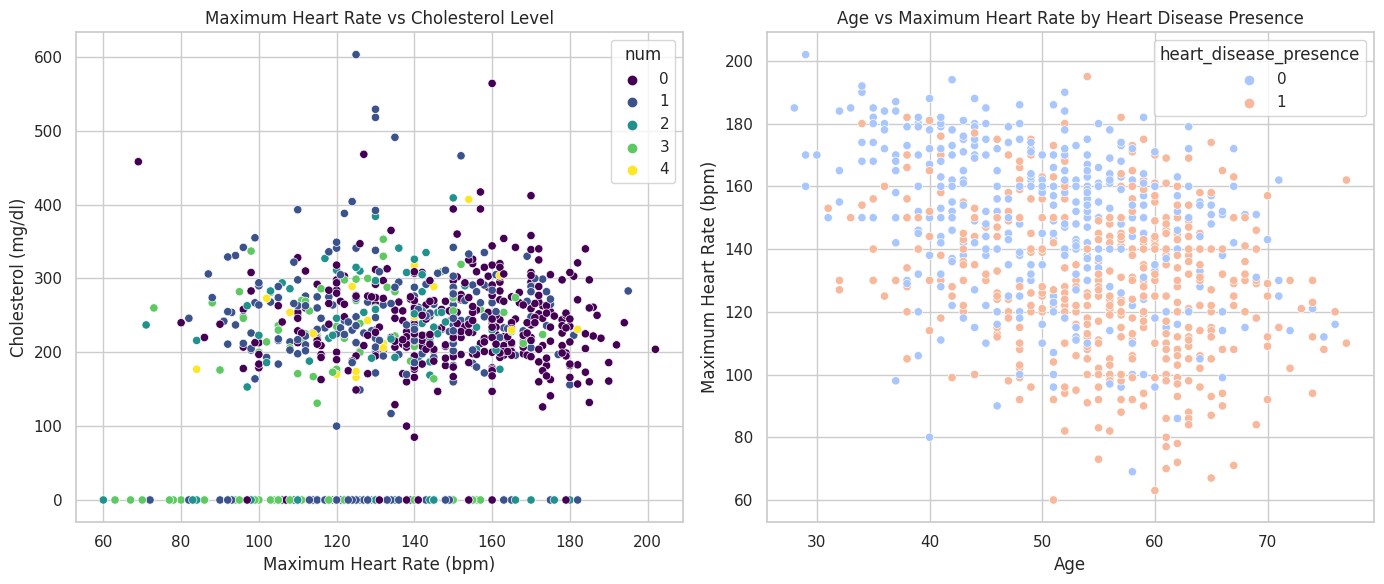

In [710]:
plt.figure(figsize=(14, 6))

# Maximum heart rate and cholesterol levels by heart disease presence
plt.subplot(1, 2, 1)
sns.scatterplot(x='thalch', y='chol', hue='num', data=df, palette='viridis')
plt.title('Maximum Heart Rate vs Cholesterol Level')
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Cholesterol (mg/dl)')

# Converting 'num' to a binary outcome for presence (1) or absence (0) of heart disease
df['heart_disease_presence'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Age and maximum heart rate by heart disease presence
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='thalch', hue='heart_disease_presence', data=df, palette='coolwarm')
plt.title('Age vs Maximum Heart Rate by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (bpm)')

plt.tight_layout()
plt.show()

Maximum Heart Rate vs Cholesterol Level:

* There is no clear pattern or trend between maximum heart rate and cholesterol levels when considering the presence of heart disease. Individuals with and without heart disease are spread throughout the plot without distinct clustering.
* However, there's a visible concentration of individuals with lower maximum heart rate and higher cholesterol levels who have heart disease.
Age vs Maximum Heart Rate by Heart Disease Presence:

* As age increases, the maximum heart rate achieved tends to decrease, which is a natural physiological trend.
* Individuals without heart disease (represented in blue) generally achieve higher maximum heart rates across all ages compared to those with heart disease (represented in red).
* There is a visible trend where older individuals with lower maximum heart rates tend to have a presence of heart disease.

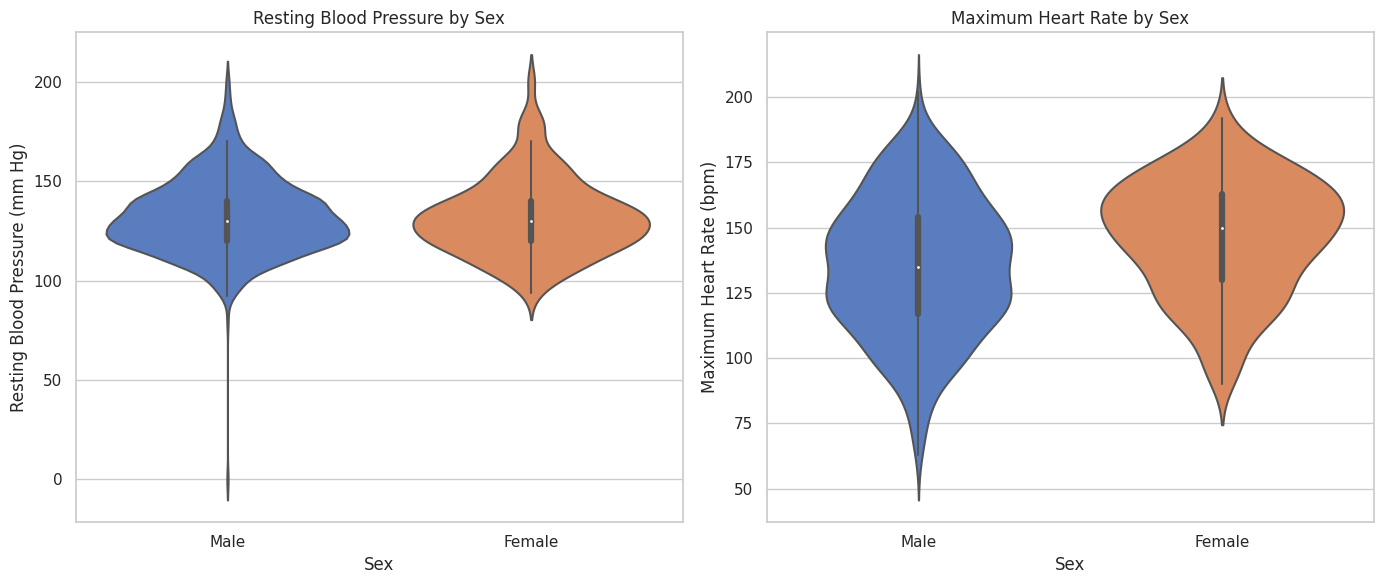

In [711]:
# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Violin plot for resting blood pressure by sex
plt.subplot(1, 2, 1)
sns.violinplot(x='sex', y='trestbps', data=df, palette='muted')
plt.title('Resting Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure (mm Hg)')

# Violin plot for maximum heart rate by sex
plt.subplot(1, 2, 2)
sns.violinplot(x='sex', y='thalch', data=df, palette='muted')
plt.title('Maximum Heart Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Maximum Heart Rate (bpm)')

# Displaying the violin plots
plt.tight_layout()
plt.show()

* Resting Blood Pressure by Sex: The distribution of resting blood pressure for males and females appears to be similar, with a slightly wider distribution for males, indicating more variability in their resting blood pressure.

* Maximum Heart Rate by Sex: There is a noticeable difference in the distribution of maximum heart rate between males and females. Females tend to have a higher maximum heart rate than males, which is consistent with general physiological differences between the sexes.

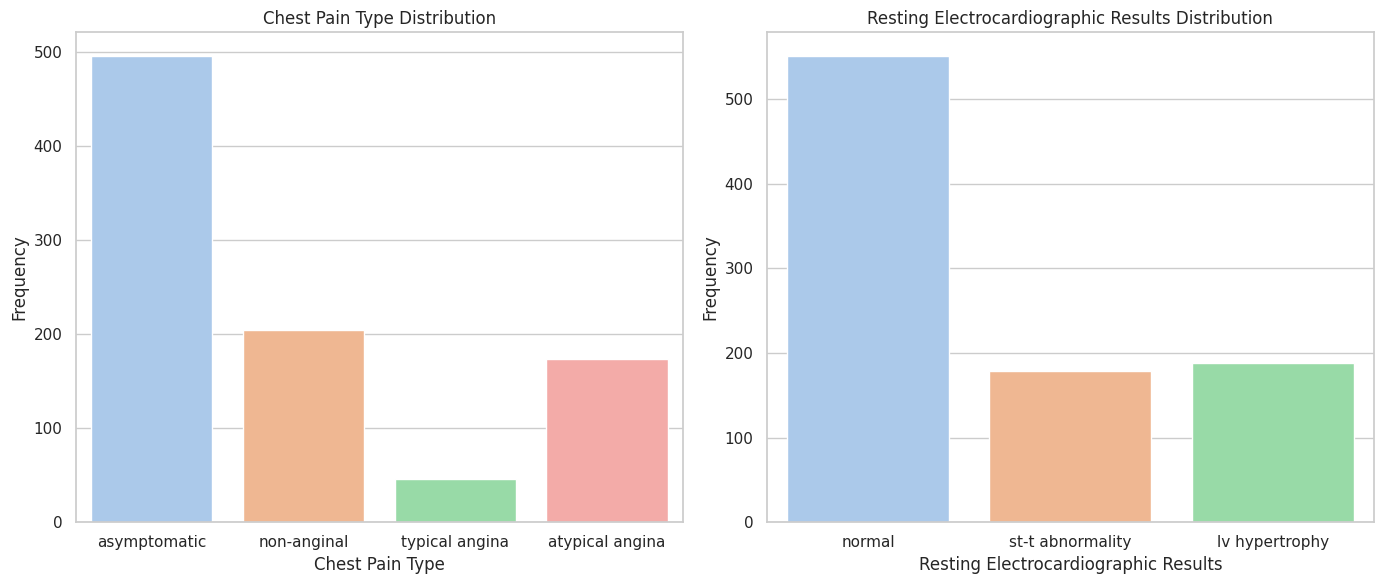

In [712]:
# Setting up the matplotlib figure
plt.figure(figsize=(14, 6))

# Bar plot for chest pain type distribution
plt.subplot(1, 2, 1)
sns.countplot(x='cp', data=df, palette='pastel')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')

# Bar plot for resting electrocardiographic results distribution
plt.subplot(1, 2, 2)
sns.countplot(x='restecg', data=df, palette='pastel')
plt.title('Resting Electrocardiographic Results Distribution')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')

# Displaying the bar plots
plt.tight_layout()
plt.show()


* Chest Pain Type (cp): The majority of observations are of the "asymptomatic" chest pain type, followed by "non-anginal pain", "atypical angina", and a few cases of "typical angina".

* Resting Electrocardiographic Results (restecg): The most common electrocardiographic result is "normal", with "hypertrophy" and "ST-T wave abnormality" being less frequent.

## Correlation Between Variables

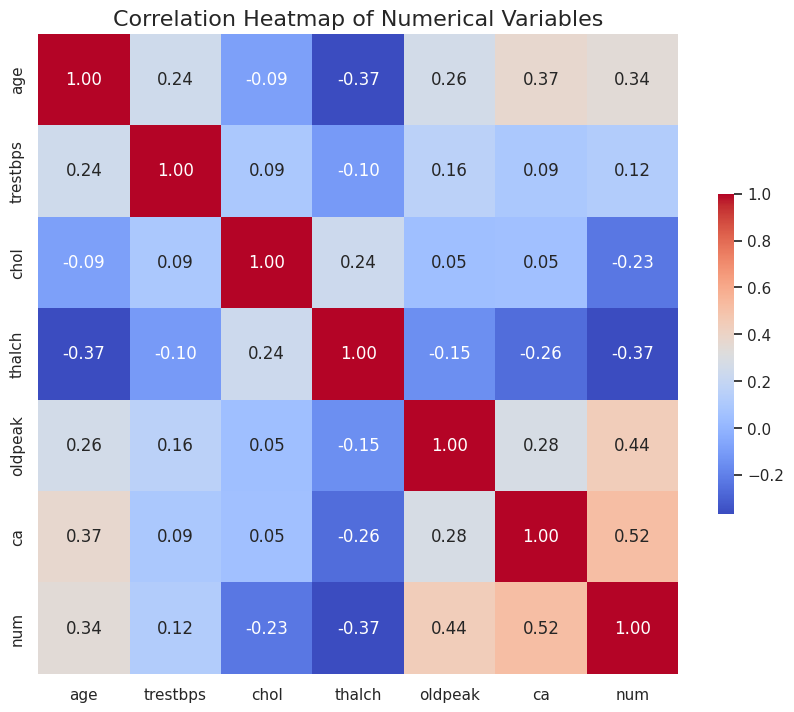

In [713]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
numerical_data = df[numerical_cols]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
ax.set_title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
plt.show()


From the correlation matrix:
* ***age*** has a moderate positive correlation with ***num*** (the diagnosis of heart disease), this show that older individuals may have a higher risk of heart disease.
* ***oldpeak*** (ST depression) also shows a moderate positive correlation with ***num***, suggesting that higher ST depression could be associated with heart disease.
* ***ca*** (number of major vessels) has a strong positive correlation with ***num***, which is a significant indicator as the presence of more vessels could be associated with a higher likelihood of heart disease.
* There are no very strong correlations between the other variables, indicating that no single factor is overwhelmingly dominant in predicting heart disease.

# Preprocessing Steps



## Handling Missing Values

In this dataset, we removed columns with a high percentages of missing values ('ca', 'thal', 'slope') as their absence could impact model accuracy and imputation may introduce bias.

For the numerical columns, we used Median Imputation on columns 'trestbps', 'chol', 'thalch', 'oldpeak'. The reason of using median imputation is less sensitive to outliers than the mean.

For categorical columns, we used Mode Imputation on columns 'fbs', 'restecg', 'exang', 'slope', 'thal'

In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 903 to 792
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      920 non-null    int64  
 1   age                     920 non-null    int64  
 2   sex                     920 non-null    object 
 3   dataset                 920 non-null    object 
 4   cp                      920 non-null    object 
 5   trestbps                861 non-null    float64
 6   chol                    890 non-null    float64
 7   fbs                     830 non-null    object 
 8   restecg                 918 non-null    object 
 9   thalch                  865 non-null    float64
 10  exang                   865 non-null    object 
 11  oldpeak                 858 non-null    float64
 12  slope                   611 non-null    object 
 13  ca                      309 non-null    float64
 14  thal                    434 non-null    

In [715]:
# List of numerical columns for median imputation
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Applying median imputation to the numerical columns
for column in numerical_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

# List of categorical columns for mode imputation
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']

# Applying mode imputation to the categorical columns
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]


Series([], dtype: int64)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 903 to 792
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      920 non-null    int64  
 1   age                     920 non-null    int64  
 2   sex                     920 non-null    object 
 3   dataset                 920 non-null    object 
 4   cp                      920 non-null    object 
 5   trestbps                920 non-null    float64
 6   chol                    920 non-null    float64
 7   fbs                     920 non-null    bool   
 8   restecg                 920 non-null    object 
 9   thalch                  920 non-null    float64
 10  exang                   920 non-null    bool   
 11  oldpeak                 920 non-null    float64
 12  slope                   920 non-null    object 
 13  ca                      920 non-null    float64
 14  thal                    920 non-null    

## Data Transformation

From what we observed, the columns 'num' contains the target as 0,1,2,3,4. However, for identifying, it is simply the presence of disease. So we binarize it to such:

* 0 will represent patients without heart disease
* 1 will represent patients with any level of heart disease (originally labeled as 1, 2, 3, or 4)

The numerical features have been standardized, and one-hot encoding has been applied to the categorical features, with the first category dropped to avoid the dummy variable trap (which is a situation where independent variables are multicollinear).

In [717]:
df['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
df['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = df[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((df['num'] > 0)*1).copy()
data_tmp['sex'] = (df['sex'] == 'Male')*1
data_tmp['fbs'] = (df['fbs'])*1
data_tmp['exang'] = (df['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
903,56,1,asymptomatic,130.0,203.0,1,98.0,0,1.5,flat,0.0,reversable_defect,1
368,43,0,non-anginal,150.0,223.0,0,175.0,0,0.0,flat,0.0,normal,0
362,43,0,typical_angina,100.0,223.0,0,142.0,0,0.0,flat,0.0,normal,0
522,57,1,atypical_angina,140.0,265.0,0,145.0,1,1.0,flat,0.0,normal,1
532,43,1,typical_angina,120.0,291.0,0,155.0,0,0.0,flat,0.0,normal,1
677,60,1,asymptomatic,135.0,0.0,0,63.0,1,0.5,upsloping,0.0,reversable_defect,1
675,60,1,asymptomatic,125.0,0.0,0,110.0,0,0.1,upsloping,2.0,normal,1
460,55,0,atypical_angina,122.0,320.0,0,155.0,0,0.0,flat,0.0,normal,0
726,65,1,asymptomatic,150.0,236.0,1,105.0,1,0.0,flat,0.0,normal,1
602,38,0,asymptomatic,110.0,0.0,0,156.0,0,0.0,flat,0.0,normal,1


In [718]:
df = pd.get_dummies(data_tmp, drop_first=False)

In [719]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 903 to 792
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 920 non-null    int64  
 1   sex                                 920 non-null    int64  
 2   resting_blood_pressure              920 non-null    float64
 3   cholesterol                         920 non-null    float64
 4   fasting_blood_sugar                 920 non-null    int64  
 5   max_heart_rate_achieved             920 non-null    float64
 6   exercise_induced_angina             920 non-null    int64  
 7   st_depression                       920 non-null    float64
 8   num_major_vessels                   920 non-null    float64
 9   target                              920 non-null    int64  
 10  chest_pain_type_asymptomatic        920 non-null    uint8  
 11  chest_pain_type_atypical_angina     920 non

## Feature Engineering

In the context of predicting heart disease, we might consider interactions between features that could be indicative of higher risk. For instance, combining age with cholesterol levels, blood pressure, and heart rate could highlight risk patterns that are not evident when considering these features independently.

Here is the new Features we came up with:
1. Blood Pressure Categories: Create categories for blood pressure (e.g., 'normal', 'elevated', 'high') based on medical guidelines.
* Normal: Systolic <120 and Diastolic < 80
* Elevated: Systolic 120-129 and Diastolic < 80
* Hypertension Stage 1: Systolic 130-139 or Diastolic 80-89
* Hypertension Stage 2: Systolic >=140 or Diastolic >=90
2. Cholesterol Ratio: The ratio of total cholesterol to HDL cholesterol, which is a known risk factor for heart disease.
3. Heart Rate Pressure Product: Multiply resting blood pressure by maximum heart rate, an index of myocardial oxygen consumption.
4. Combined Stress Test Features: Combine the results of exercise-induced angina (exang), ST depression (oldpeak), and the slope of the peak exercise ST segment into a single risk score.
5. Interaction Terms: Create interaction terms for features that might amplify each other's effects, such as age with trestbps and chol.

Blood Pressure Categories: We will categorize blood pressure based on the systolic value since we don't have diastolic values. We'll use the following numerical encoding for the categories according to the following medical guideline:

* Normal: 0 (Systolic < 120)
* Elevated: 1 (Systolic 120-129)
* Hypertension Stage 1: 2 (Systolic 130-139)
* Hypertension Stage 2: 3 (Systolic >= 140)

In [720]:
# Feature 1: Blood Pressure Categories
def categorize_blood_pressure(systolic_bp):
    if systolic_bp < 120:
        return 0  # Normal
    elif 120 <= systolic_bp < 130:
        return 1  # Elevated
    elif 130 <= systolic_bp < 140:
        return 2  # Hypertension Stage 1
    else:
        return 3  # Hypertension Stage 2

# Apply the function to the resting blood pressure column
df['blood_pressure_category'] = df['resting_blood_pressure'].apply(categorize_blood_pressure)

In [721]:
# Feature 2: Cholesterol Ratio Binarized
def categorize_cholesterol(cholesterol_level):
    return 1 if cholesterol_level >= 240 else 0

# Apply the function to the cholesterol column
df['cholesterol_risk'] = df['cholesterol'].apply(categorize_cholesterol)


Heart Rate Pressure Product:
* Calculated as the product of resting blood pressure and maximum heart rate achieved.

In [722]:
# Feature 3: Heart Rate Pressure Product
df['heart_rate_pressure_product'] = df['resting_blood_pressure'] * df['max_heart_rate_achieved']

Combined Stress Test Score:
* This score is a sum of exercise_induced_angina, st_depression, and a weighted sum of the ST slope type.
* The weights for ST slope types are assumed to be 0 for st_slope_type_upsloping, 1 for st_slope_type_flat, and 2 for st_slope_type_downsloping

In [723]:
# Identify the columns for ST slope types
st_slope_columns = [col for col in df.columns if 'st_slope_type' in col]
st_slope_weights = {'st_slope_type_upsloping': 0, 'st_slope_type_flat': 1, 'st_slope_type_downsloping': 2}

# Feature 4: Combined Stress Test Features
df['combined_stress_test_score'] = (
    df['exercise_induced_angina'] +
    df['st_depression'] +
    sum(df[col] * weight for col, weight in st_slope_weights.items())
)

Interaction Terms:
* We will create interaction terms by multiplying age with resting_blood_pressure and cholesterol.

In [724]:
# Feature 5: Interaction Terms
df['age_trestbps_interaction'] = df['age'] * df['resting_blood_pressure']
df['age_chol_interaction'] = df['age'] * df['cholesterol']

In [725]:
df[['blood_pressure_category', 'heart_rate_pressure_product', 'age_trestbps_interaction', 'age_chol_interaction', 'combined_stress_test_score']].head()

,blood_pressure_category,heart_rate_pressure_product,age_trestbps_interaction,age_chol_interaction,combined_stress_test_score
903,2,12740.0,7280.0,11368.0,2.5
368,3,26250.0,6450.0,9589.0,1.0
362,0,14200.0,4300.0,9589.0,1.0
522,3,20300.0,7980.0,15105.0,3.0
532,1,18600.0,5160.0,12513.0,1.0


In [726]:
df.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect,blood_pressure_category,cholesterol_risk,heart_rate_pressure_product,combined_stress_test_score,age_trestbps_interaction,age_chol_interaction
903,56,1,130.0,203.0,1,98.0,0,1.5,0.0,1,...,0,0,0,1,2,0,12740.0,2.5,7280.0,11368.0
368,43,0,150.0,223.0,0,175.0,0,0.0,0.0,0,...,0,0,1,0,3,0,26250.0,1.0,6450.0,9589.0
362,43,0,100.0,223.0,0,142.0,0,0.0,0.0,0,...,0,0,1,0,0,0,14200.0,1.0,4300.0,9589.0
522,57,1,140.0,265.0,0,145.0,1,1.0,0.0,1,...,0,0,1,0,3,1,20300.0,3.0,7980.0,15105.0
532,43,1,120.0,291.0,0,155.0,0,0.0,0.0,1,...,0,0,1,0,1,1,18600.0,1.0,5160.0,12513.0


In [727]:
#df.to_csv('my_data.csv', index=False)

#from google.colab import files
#files.download('my_data.csv')

## Model Training

The dataset splitted into training and testing sets, with 644 samples in the training set and 276 samples in the testing set. The ratio of train/test is 70% and 30%.

In [728]:
from sklearn.model_selection import train_test_split

target_column = 'target'
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((736, 25), (184, 25), (736,), (184,))

In this session, we evaluated and compared 6 models from the machine learning techniques:

1. Decision Tree Classifier
2. Random Forest Classifier
3. XGB Classifier
4. LGBM Classifier
5. ExtraTrees Classifier
6. AdaBoost Classifier

### Decision Tree
Now, we'll proceed with training a Decision Tree classifier using the training data. After training, we'll evaluate the model's performance on the test data.

In [729]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [730]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier = DecisionTreeClassifier(random_state=42)


random_search_dt = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_grid_dt,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_dt.fit(X_train, y_train)
best_dt_classifier = random_search_dt.best_estimator_
y_pred_dt = best_dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, f1_score_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary')

performance_metrics_dt = {
    "Accuracy": accuracy_dt,
    "Precision": precision_dt,
    "Recall": recall_dt,
    "F1-score": f1_score_dt
}

performance_metrics_dt


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'Accuracy': 0.7880434782608695,
 'Precision': 0.8333333333333334,
 'Recall': 0.7766990291262136,
 'F1-score': 0.8040201005025125}

### Random Forest

In [731]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid_rf,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
best_rf_classifier = random_search_rf.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')

performance_metrics_rf = {
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1-score": f1_score_rf
}

performance_metrics_rf


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'Accuracy': 0.8532608695652174,
 'Precision': 0.8725490196078431,
 'Recall': 0.8640776699029126,
 'F1-score': 0.8682926829268292}

### XGB Classifer

In [732]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5, 1, 1.5, 2],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid_xgb,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)
best_xgb_classifier = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb, recall_xgb, f1_score_xgb, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')

performance_metrics_xgb = {
    "Accuracy": accuracy_xgb,
    "Precision": precision_xgb,
    "Recall": recall_xgb,
    "F1-score": f1_score_xgb
}

performance_metrics_xgb

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'Accuracy': 0.8206521739130435,
 'Precision': 0.8365384615384616,
 'Recall': 0.8446601941747572,
 'F1-score': 0.8405797101449275}

### LGBM Classifier

In [733]:
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [10, 15],
    'num_leaves': [20, 31],
    'boosting_type': ['gbdt'],
}

lgbm_classifier = LGBMClassifier(random_state=42, n_jobs=-1)

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_classifier,
    param_distributions=param_grid_lgbm,
    n_iter=10,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)


fit_params={"early_stopping_rounds":30,
            "eval_set":[(X_test, y_test)],
            "verbose":0}

random_search_lgbm.fit(X_train, y_train)
best_lgbm_classifier = random_search_lgbm.best_estimator_

y_pred_lgbm = best_lgbm_classifier.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm, recall_lgbm, f1_score_lgbm, _ = precision_recall_fscore_support(y_test, y_pred_lgbm, average='binary')

performance_metrics_lgbm = {
    "Accuracy": accuracy_lgbm,
    "Precision": precision_lgbm,
    "Recall": recall_lgbm,
    "F1-score": f1_score_lgbm
}

performance_metrics_lgbm


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 406, number of negative: 330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1116
[LightGBM] [Info] Number of data points in the train set: 736, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.551630 -> initscore=0.207261
[LightGBM] [Info] Start training from score 0.207261
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

{'Accuracy': 0.842391304347826,
 'Precision': 0.8557692307692307,
 'Recall': 0.8640776699029126,
 'F1-score': 0.8599033816425121}

### ExtraTrees Classifier

In [734]:
param_grid_et = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

et_classifier = ExtraTreesClassifier(random_state=42)
random_search_et = RandomizedSearchCV(
    estimator=et_classifier,
    param_distributions=param_grid_et,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_et.fit(X_train, y_train)
best_et_classifier = random_search_et.best_estimator_
y_pred_et = best_et_classifier.predict(X_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et, recall_et, f1_score_et, _ = precision_recall_fscore_support(y_test, y_pred_et, average='binary')

performance_metrics_et = {
    "Accuracy": accuracy_et,
    "Precision": precision_et,
    "Recall": recall_et,
    "F1-score": f1_score_et
}

performance_metrics_et

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'Accuracy': 0.8206521739130435,
 'Precision': 0.8804347826086957,
 'Recall': 0.7864077669902912,
 'F1-score': 0.8307692307692308}

### AdaBoost Classifier

In [735]:
param_grid_ab = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1.0],
    'base_estimator__max_depth': [1, 2, 3, 4, 5],
    'base_estimator__min_samples_split': [2, 5, 10, 20],
    'base_estimator__min_samples_leaf': [1, 2, 4, 6]
}

base_estimator = DecisionTreeClassifier(random_state=42)
ab_classifier = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)
random_search_ab = RandomizedSearchCV(
    estimator=ab_classifier,
    param_distributions=param_grid_ab,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_ab.fit(X_train, y_train)
best_ab_classifier = random_search_ab.best_estimator_
y_pred_ab = best_ab_classifier.predict(X_test)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
precision_ab, recall_ab, f1_score_ab, _ = precision_recall_fscore_support(y_test, y_pred_ab, average='binary')

performance_metrics_ab = {
    "Accuracy": accuracy_ab,
    "Precision": precision_ab,
    "Recall": recall_ab,
    "F1-score": f1_score_ab
}

performance_metrics_ab

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'Accuracy': 0.842391304347826,
 'Precision': 0.8627450980392157,
 'Recall': 0.8543689320388349,
 'F1-score': 0.8585365853658536}

### Logistic Regression

In [736]:
param_grid_lr = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

lr_classifier = LogisticRegression(random_state=42)
random_search_lr = RandomizedSearchCV(
    estimator=lr_classifier,
    param_distributions=param_grid_lr,
    n_iter=100,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_lr.fit(X_train, y_train)
best_lr_classifier = random_search_lr.best_estimator_
y_pred_lr = best_lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr, recall_lr, f1_score_lr, _ = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')

performance_metrics_lr = {
    "Accuracy": accuracy_lr,
    "Precision": precision_lr,
    "Recall": recall_lr,
    "F1-score": f1_score_lr
}

performance_metrics_lr

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' 

{'Accuracy': 0.8586956521739131,
 'Precision': 0.8811881188118812,
 'Recall': 0.8640776699029126,
 'F1-score': 0.8725490196078431}

## Summarise all Models

In [737]:
model_performance = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Extra Trees', 'AdaBoost', 'Logistic Regression'],
    'Accuracy (%)': [accuracy_dt*100, accuracy_rf*100, accuracy_xgb*100, accuracy_lgbm*100, accuracy_et*100, accuracy_ab*100, accuracy_lr*100],
    'Precision (%)': [precision_dt*100, precision_rf*100, precision_xgb*100, precision_lgbm*100, precision_et*100, precision_ab*100, precision_lr*100],
    'Recall (%)': [recall_dt*100, recall_rf*100, recall_xgb*100, recall_lgbm*100, recall_et*100, recall_ab*100, recall_lr*100],
    'F1-Score (%)': [f1_score_dt*100, f1_score_rf*100, f1_score_xgb*100, f1_score_lgbm*100, f1_score_et*100, f1_score_ab*100, f1_score_lr*100]
}

performance_comparison = pd.DataFrame(model_performance)
performance_comparison_df_sorted_by_accuracy = performance_comparison.sort_values('Accuracy (%)', ascending=False)

In [738]:
performance_comparison_df_sorted_by_accuracy

,Model,Accuracy (%),Precision (%),Recall (%),F1-Score (%)
6,Logistic Regression,85.869565,88.118812,86.407767,87.254902
1,Random Forest,85.326087,87.254902,86.407767,86.829268
3,LightGBM,84.239130,85.576923,86.407767,85.990338
5,AdaBoost,84.239130,86.274510,85.436893,85.853659
2,XGBoost,82.065217,83.653846,84.466019,84.057971
4,Extra Trees,82.065217,88.043478,78.640777,83.076923
0,Decision Tree,78.804348,83.333333,77.669903,80.402010


### Confusion Matrix

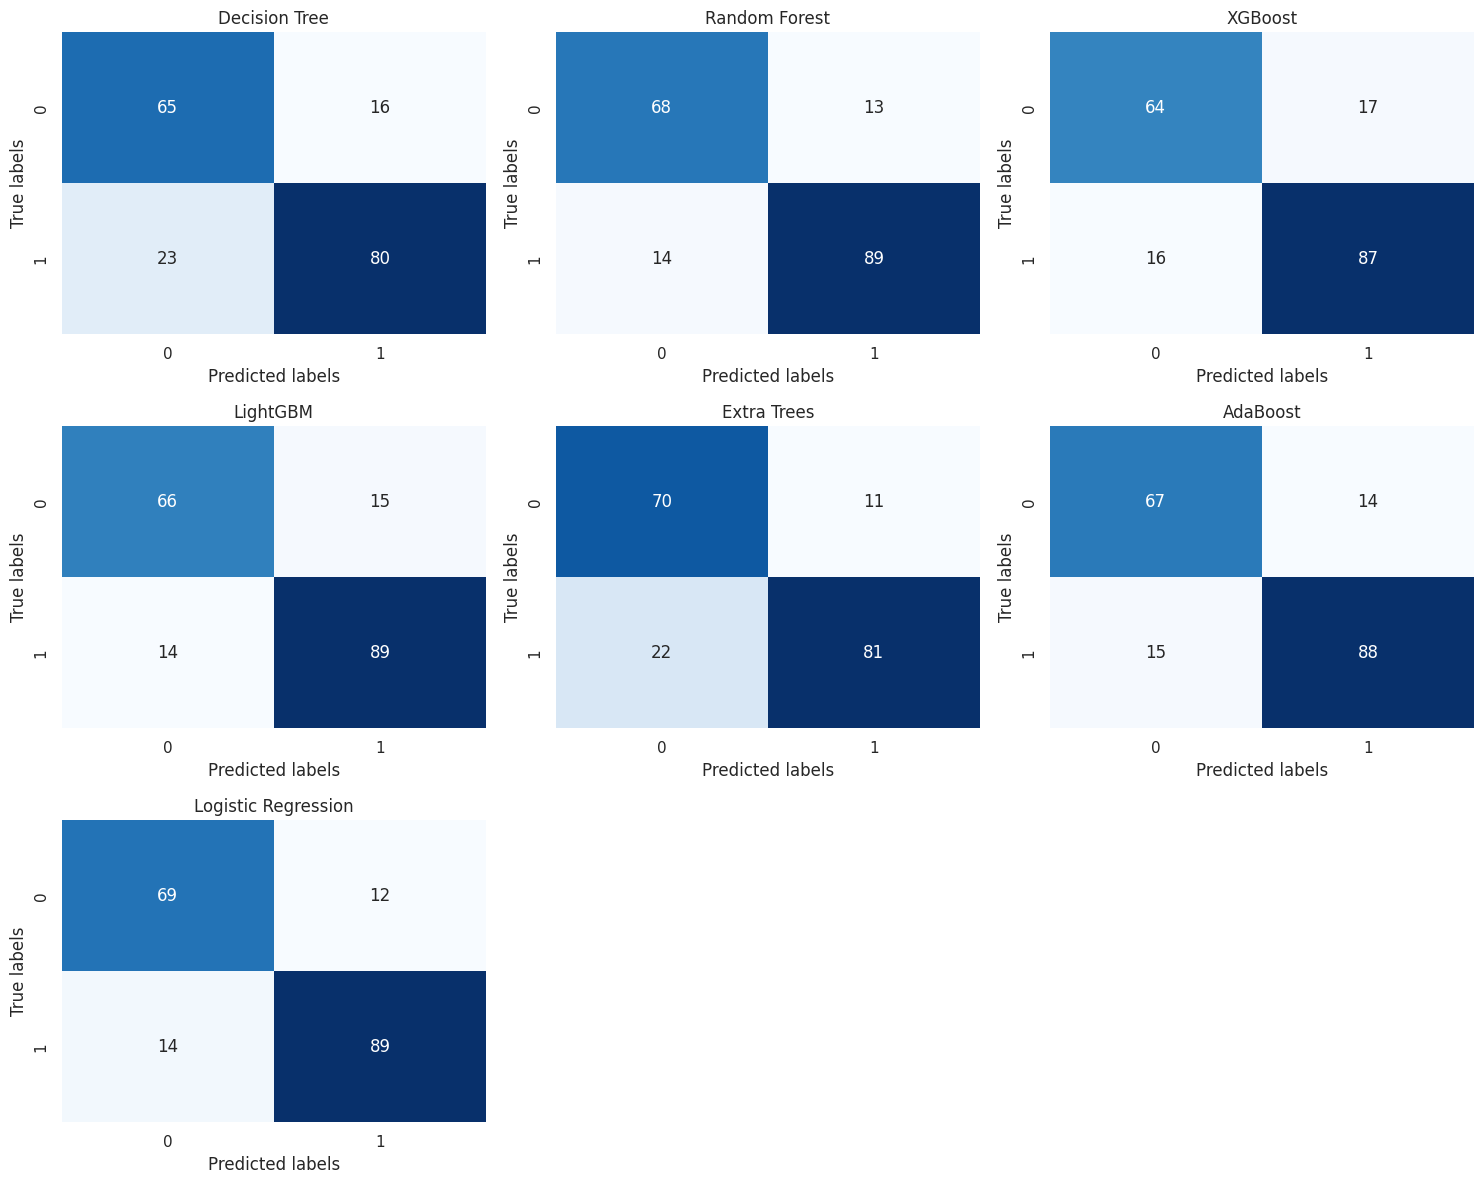

In [739]:
from sklearn.metrics import confusion_matrix

y_pred_dict = {
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgbm,
    'Extra Trees': y_pred_et,
    'AdaBoost': y_pred_ab,
    'Logistic Regression': y_pred_lr
}


def compute_confusion_matrix(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    return matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for ax, (model_name, y_pred) in zip(axes, y_pred_dict.items()):
    matrix = compute_confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

for ax in axes[len(y_pred_dict):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
